<a href="https://colab.research.google.com/github/helonayala/bah/blob/main/narmax_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install sysidentpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.metrics import mean_squared_error
from scipy.io import loadmat
import matplotlib.pyplot as plt

from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation


In [2]:
!ls

malha_fechada2.mat  sample_data		 seqDegrausFixo.mat   seqDegrausRand.mat
malha_fechada.mat   seqDegrausFixo2.mat  seqDegrausRand2.mat


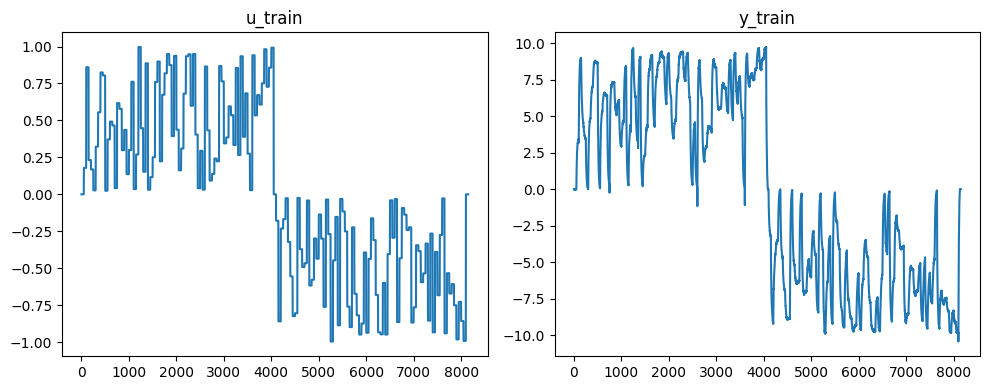

In [13]:
# prompt: plot u_train and y_train in separate graphs side by side

mat = loadmat('seqDegrausRand2.mat')
y_train= mat['y']
u_train = mat['u']

n_train = len(y_train)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(u_train)
ax[0].set_title('u_train')

ax[1].plot(y_train)
ax[1].set_title('y_train')

plt.tight_layout()
plt.show()


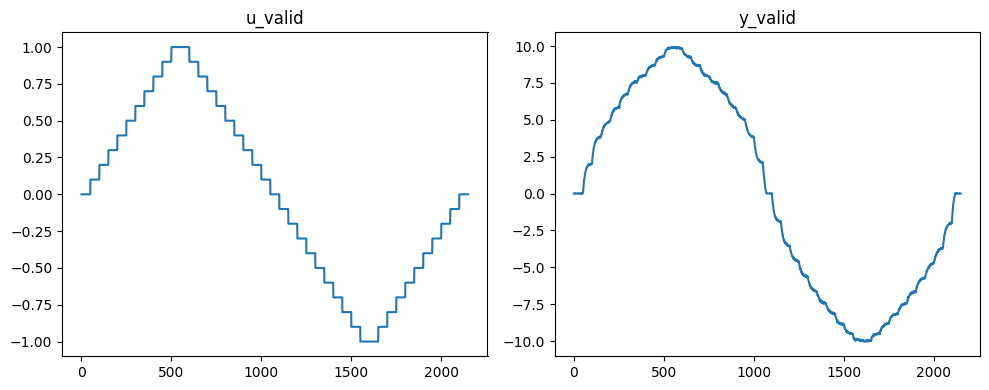

In [16]:
# prompt: now do the same with the file seqDegrausFixo2.mat, but use the sufix 'valid' please

mat = loadmat('seqDegrausFixo2.mat')
y_valid = mat['y']
u_valid = mat['u']
n_valid = len(y_valid)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(u_valid)
ax[0].set_title('u_valid')

ax[1].plot(y_valid)
ax[1].set_title('y_valid')

plt.tight_layout()
plt.show()


In [8]:

basis_function = Polynomial(degree=2)
model = FROLS(
    order_selection=False,
    n_info_values=10,
    n_terms = 4,
    # extended_least_squares=False,
    ylag=10,
    xlag=10,
    info_criteria='aic',
    # estimator='least_squares',
    basis_function=basis_function
)
model.fit(X=u_train, y=y_train)
r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)


  Regressors   Parameters             ERR
0     y(k-1)   1.0407E+00  9.99580615E-01
1    x1(k-1)   5.2606E-01  2.12235551E-04
2   x1(k-10)  -3.7866E-01  2.88540721E-05
3    y(k-10)  -5.5512E-02  1.60587928E-05


1.7118788618946994


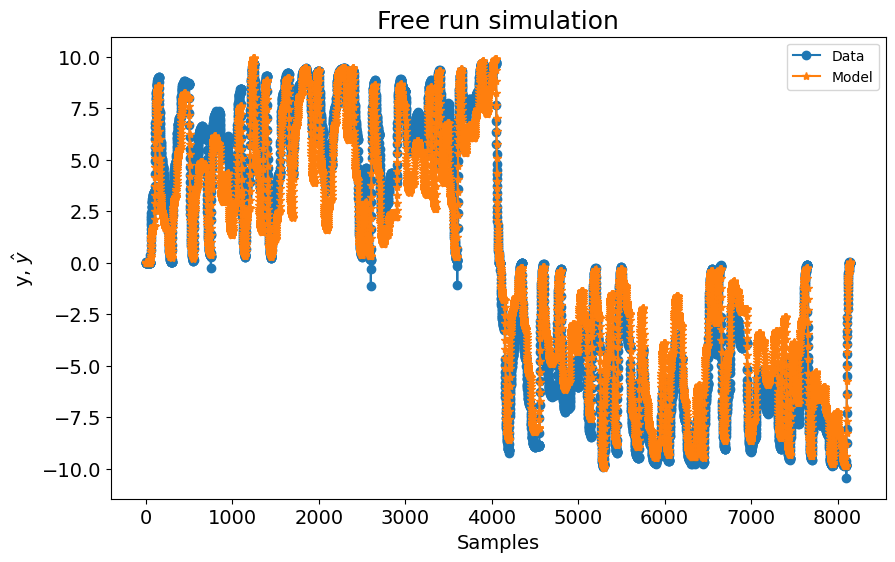

In [14]:
yhat = model.predict(X=u_train, y=y_train)
mse = mean_squared_error(y_train, yhat)
print(mse)
plot_results(y=y_train, yhat=yhat, n = n_train)
# ee = compute_residues_autocorrelation(y_train, yhat)

# plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
# x1e = compute_cross_correlation(y_train, yhat, u_train)
# plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

1.659563457044444


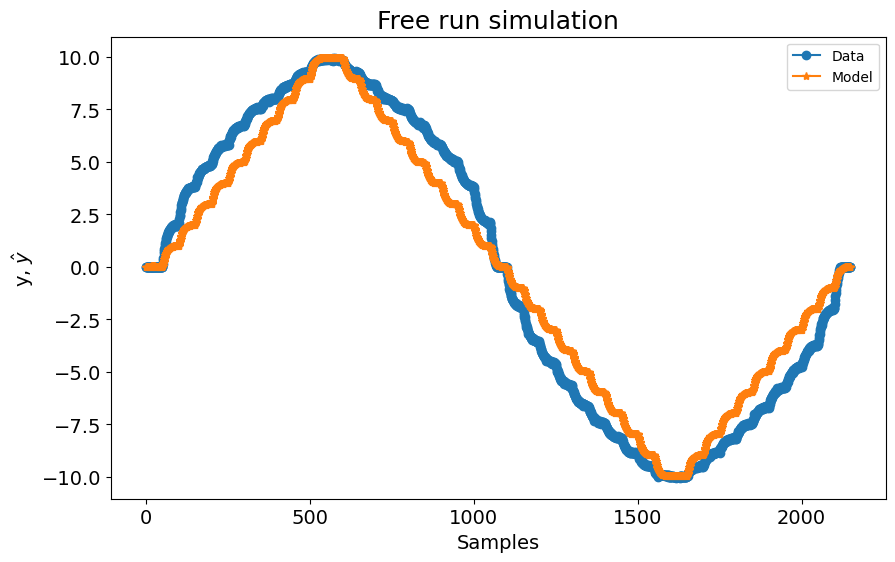

In [17]:

yhat = model.predict(X=u_valid, y=y_valid)
mse = mean_squared_error(y_valid, yhat)
print(mse)
plot_results(y=y_valid, yhat=yhat, n=n_valid)
# ee = compute_residues_autocorrelation(y_valid, yhat)

# plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
# x1e = compute_cross_correlation(y_valid, yhat, u_valid)
# plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")
